## Exploratory Data Analysis

In this notebook, I try to use the NIST dataset that contains the handwriting of digits. I will try to use the appropriate ML algorithm to predict the handwriting.

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
%matplotlib inline

In [6]:
digits = datasets.load_digits()

In [7]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['number']= digits.target

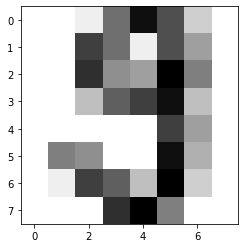

In [11]:
plt.imshow(digits.images[901], cmap=plt.cm.gray_r, interpolation='nearest')

In [12]:
digits.target[901]

9

## Create ML Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [14]:
X = digits.data
y = digits.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, stratify=y, random_state=42)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = knn.predict(X_test)

In [20]:
knn.score(X_test, y_test)

0.9575799721835884

## Create Confusion matrix and classification report

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
print(confusion_matrix(y_test, y_pred))

[[141   0   0   0   1   0   0   0   0   0]
 [  0 131  10   0   0   1   3   0   0   1]
 [  0   1 141   0   0   0   0   0   0   0]
 [  0   0   0 143   0   0   0   1   1   1]
 [  0   0   0   0 141   0   1   3   0   0]
 [  1   0   0   1   3 138   1   0   0   2]
 [  0   1   0   0   0   0 144   0   0   0]
 [  0   0   0   0   0   0   0 143   0   0]
 [  0   7   2   2   0   1   0   0 125   2]
 [  0   2   0   2   0   4   0   4   2 130]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       0.92      0.90      0.91       146
           2       0.92      0.99      0.96       142
           3       0.97      0.98      0.97       146
           4       0.97      0.97      0.97       145
           5       0.96      0.95      0.95       146
           6       0.97      0.99      0.98       145
           7       0.95      1.00      0.97       143
           8       0.98      0.90      0.94       139
           9       0.96      0.90      0.93       144

    accuracy                           0.96      1438
   macro avg       0.96      0.96      0.96      1438
weighted avg       0.96      0.96      0.96      1438



## Hyperparameter tuning

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
grid_params = {'n_neighbors': range(1, 20)}

In [27]:
knn = KNeighborsClassifier()

In [28]:
knn_cv = GridSearchCV(knn, grid_params, cv = 5)

In [30]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [31]:
knn_cv.best_params_

{'n_neighbors': 1}

In [32]:
knn_cv.best_score_

0.9805555555555555